In [125]:
# Importar librerias
import sympy as sp

In [126]:
# definir simbolos
x = sp.Symbol("x")
t = sp.Symbol("t")
m = sp.Symbol("m")
g = sp.Symbol("g")
k = sp.Symbol("k")
C1 = sp.Symbol("C1")
v = sp.Function("v")(t)

In [127]:
# definir ecu dif
eqq = sp.Eq(v.diff(t) - (m * g - v * k) / m, 0)
eqq

Eq(Derivative(v(t), t) - (g*m - k*v(t))/m, 0)

In [128]:
# resolver ecu dif
sol = sp.dsolve(eqq)
v_fun = sol.rhs
sol

Eq(v(t), C1*exp(-k*t/m) + g*m/k)

In [129]:
# ecnontrar C1, cuando t = 0 y v(t) = 0
def_v_fun = v_fun.subs({t: 0, k: 1000, g: -9.81, m: 500})
c = sp.solve(def_v_fun)[0]
c

4.90500000000000

In [130]:
# substituir valores
def_v_fun = v_fun.subs({C1: c, k: 1000, g: -9.81, m: 500})
def_v_fun

-4.905 + 4.905*exp(-2*t)

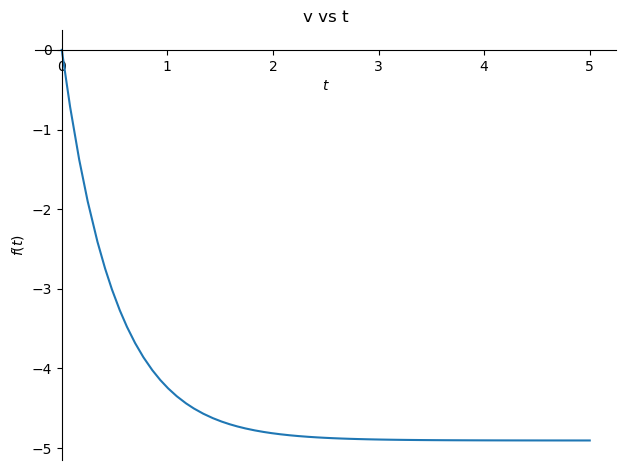

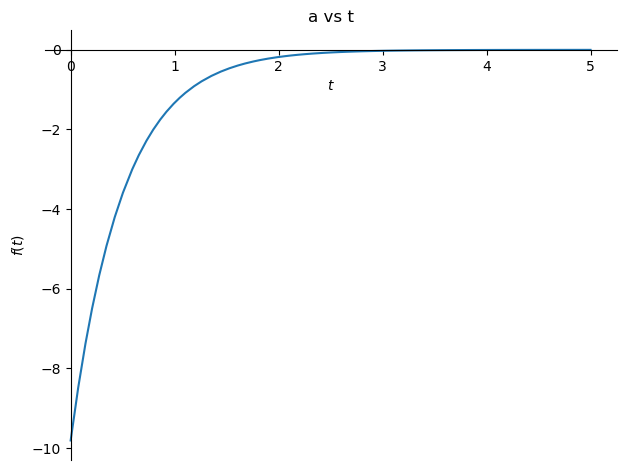

In [131]:
# graficar
sp.plot(def_v_fun, (t, 0, 5), title="v vs t")
sp.plot(def_v_fun.diff(t), (t, 0, 5), title="a vs t")